# Global x Local temperature analysis
In this document we'll compare the Global temperature variations with the Local temperature, considering the city of Curitiba-PR Brazil for the Local temp. and ranging from the year 1832 to 2013.

## Extracting the data
First of all we need to extract the data to make our analysis. From the database provided by Udacity I extracted two CSV files, one with the Global temperature and the other with the Local temperature. For normalized results, I filtered in the SQL query for the Global dataset to only return results compatible with the years available in the Local dataset.

Below are the SQL queries used for the extraction:

**Global dataset query**
```SQL
SELECT
	*
FROM global_data g
WHERE g.year BETWEEN 1832 AND 2013
```

**Local dataset query** 
```SQL
SELECT
	*
FROM city_data c
WHERE c.city = 'Curitiba'
```

## Analysing the data
After extracting the data of the database it's time to prepare the environment for the analysis and import the datasets in the notebook.

I'm using [Conda](https://docs.conda.io/en/latest/#) to setup the environment and running the analysis on a [Jupyter Notebook](https://jupyter.org/).

### Importing modules and loading the data
First of all I import all the modules that I need and also load the datasets previosly exported from the Udacity database.

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as ply

% matplotlib inline

df_global = pd.read_csv('data/global.csv', index_col='year')
df_local = pd.read_csv('data/local.csv', index_col='year')

### Preparing data for analysis
After loading the data it's necessary to add the Moving Average for the datasets, to improve the analysis I added two averages considering two windows one shorter than the other for tendency analysis.

Then I remove `NaN` values to not impact in the analysis.

In [3]:
# vars to define window of MA
shortWindow=2
longWindow=6

# prepare local dataset
df_local['avg_ma']=df_local['avg_temp'].rolling(window=shortWindow).mean()
df_local['avg_ma2']=df_local['avg_temp'].rolling(window=longWindow).mean()

# prepare global dataset
df_global['avg_ma'] = df_global['avg_temp'].rolling(window=shortWindow).mean()
df_global['avg_ma2'] = df_global['avg_temp'].rolling(window=longWindow).mean()

# fill na values with mean
df_local.fillna(df_local.mean(), inplace=True)
df_global.fillna(df_global.mean(), inplace=True)

### Ploting the data

With the dataset prepared we can now plot the data in a line graph using `matplotlib` module.

In this case we plot the graphs separately because of the difference in the Y axis, this way the visualization is simplified making comparing easier.

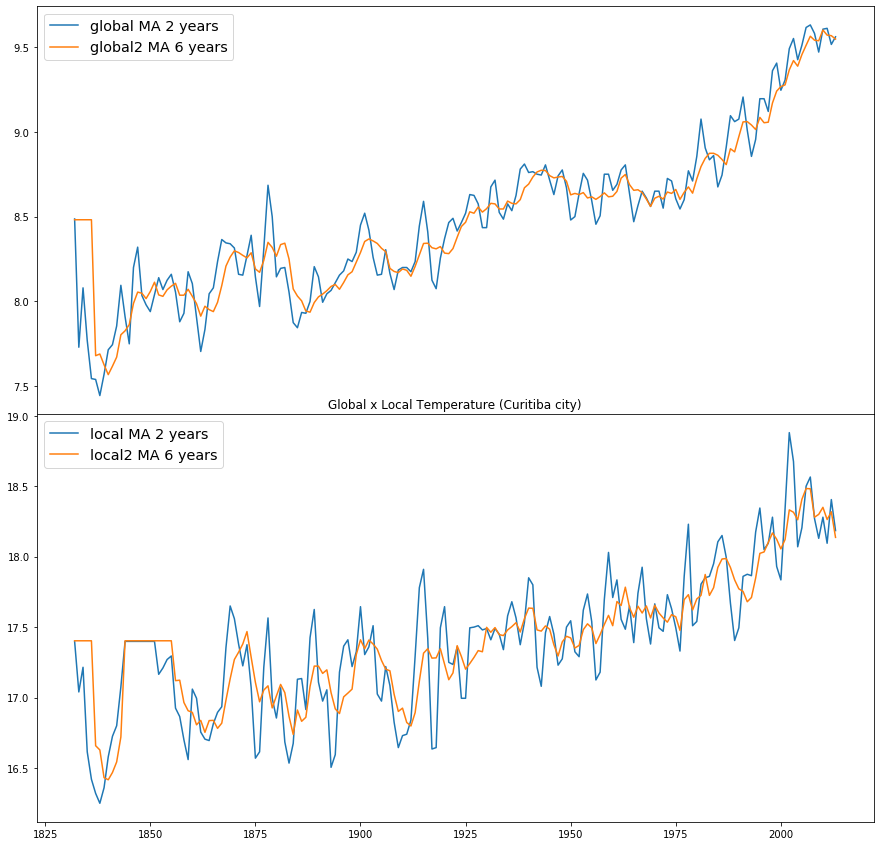

In [7]:
# Add opts and minimize height space between lines
fig, axs = ply.subplots(2,1,sharex=True, figsize=(15,15))
fig.subplots_adjust(hspace=0)

# Add title to the graph
ply.title('Global x Local Temperature (Curitiba city)')

# Plot global graph
axs[0].plot(df_global['avg_ma'], label='global MA 2 years')
axs[0].plot(df_global['avg_ma2'], label='global2 MA 6 years')
axs[0].legend(loc='upper left', fontsize='x-large')

# Plot local graph right bellow
axs[1].plot(df_local['avg_ma'], label='local MA 2 years')
axs[1].plot(df_local['avg_ma2'], label='local2 MA 6 years')
axs[1].legend(loc='upper left', fontsize='x-large');

### Making observations

With our graphs ready we can now make some observations and find relations in the data.

1. First of all, Curitiba is a city in Brazil that is famous for 

## Exporting the data

Now we just need to export the data, I'm using a lighter version of LaTeX called [TinyTeX](https://yihui.name/tinytex/) for installing only the packages needed and saving some drive space.